<a href="https://colab.research.google.com/github/deepu718/tensorflow_practice/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with tensorflow

In this notebook we're going to learn how to write neural networks for classification

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
  * Binary classification
  * Multicalss classification
  * Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


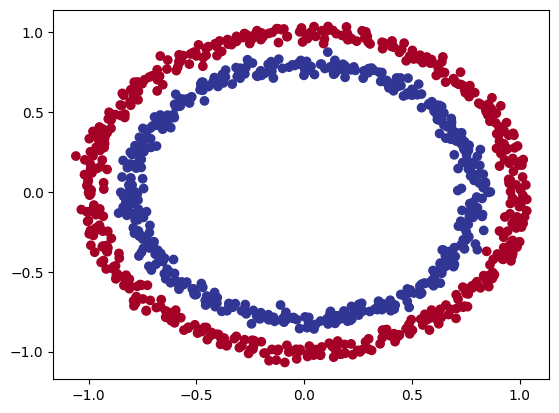

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [6]:
# Input and output shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Steps in modeling

In [7]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [8]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 5.0186 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.5422 - accuracy: 0.4690
Epoch 3/5
32/32 [==============================] - 0s 900us/step - loss: 4.0034 - accuracy: 0.4760
Epoch 4/5
32/32 [==============================] - 0s 935us/step - loss: 1.3148 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 933us/step - loss: 0.7262 - accuracy: 0.4970


In [9]:
# Let's try and improve our model by training for longer..
model.fit(X,y,epochs=200,verbose=0)
model.evaluate(X,y)

32/32 [==============================] - 0s 972us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classifiction problem and our model is getting around 50% accuracy its performing as if it's guessing.

lets add an extra layer.

In [10]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [11]:
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4190


[0.6933386325836182, 0.4189999997615814]

## Improving our model

In [12]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model_3.fit(X,y,epochs=100,verbose=0)

In [13]:
# evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6966 - accuracy: 0.4990


[0.6965582370758057, 0.49900001287460327]

to visualize our model's predictions , let's create a function `plot_decision_boundary`, this function will:
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* plot the predictions as well as ine between zone (where each unique class falls)

In [14]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  plots the decision created by a model prediction on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


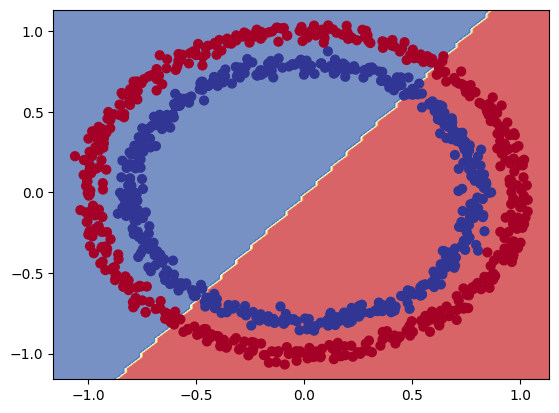

In [15]:
# Check out the predictions our model are making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [16]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)
# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


In [17]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100,verbose=0)

2/2 [==============================] - 0s 4ms/step


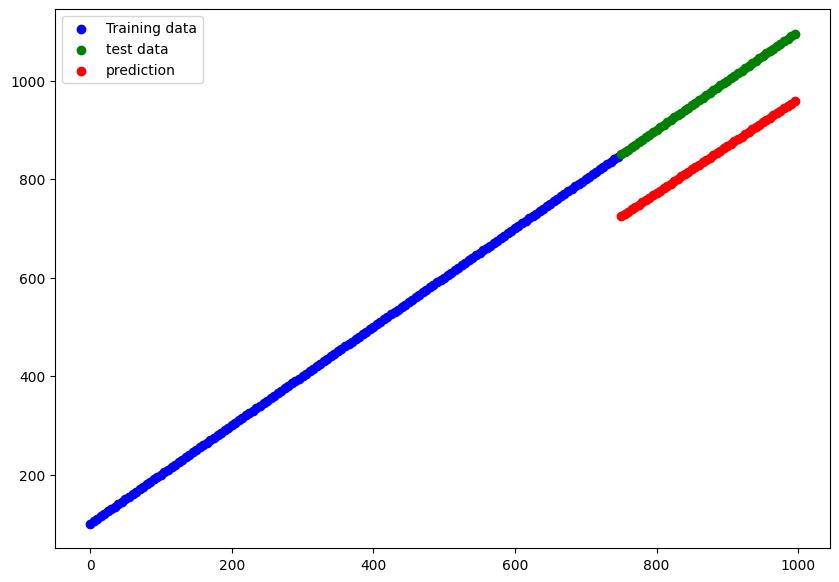

In [18]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test,axis=-1))

# plot the model
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b', label="Training data")
plt.scatter(X_reg_test,y_reg_test,c='g', label="test data")
plt.scatter(X_reg_test,y_reg_preds,c='r', label="prediction")
plt.legend();

## The missing piece: Non Linearity

In [21]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear),
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_4.fit(X,y,epochs=100,verbose=2)

Epoch 1/100
32/32 - 1s - loss: 4.9924 - accuracy: 0.4750 - 1s/epoch - 32ms/step
Epoch 2/100
32/32 - 0s - loss: 4.7296 - accuracy: 0.4760 - 49ms/epoch - 2ms/step
Epoch 3/100
32/32 - 0s - loss: 4.5513 - accuracy: 0.4750 - 47ms/epoch - 1ms/step
Epoch 4/100
32/32 - 0s - loss: 4.5371 - accuracy: 0.4740 - 116ms/epoch - 4ms/step
Epoch 5/100
32/32 - 0s - loss: 4.5335 - accuracy: 0.4740 - 101ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 4.5209 - accuracy: 0.4740 - 55ms/epoch - 2ms/step
Epoch 7/100
32/32 - 0s - loss: 4.5156 - accuracy: 0.4740 - 47ms/epoch - 1ms/step
Epoch 8/100
32/32 - 0s - loss: 4.5014 - accuracy: 0.4750 - 53ms/epoch - 2ms/step
Epoch 9/100
32/32 - 0s - loss: 4.4981 - accuracy: 0.4750 - 50ms/epoch - 2ms/step
Epoch 10/100
32/32 - 0s - loss: 4.4934 - accuracy: 0.4740 - 83ms/epoch - 3ms/step
Epoch 11/100
32/32 - 0s - loss: 4.4897 - accuracy: 0.4740 - 103ms/epoch - 3ms/step
Epoch 12/100
32/32 - 0s - loss: 4.4856 - accuracy: 0.4740 - 46ms/epoch - 1ms/step
Epoch 13/100
32/32 - 0s

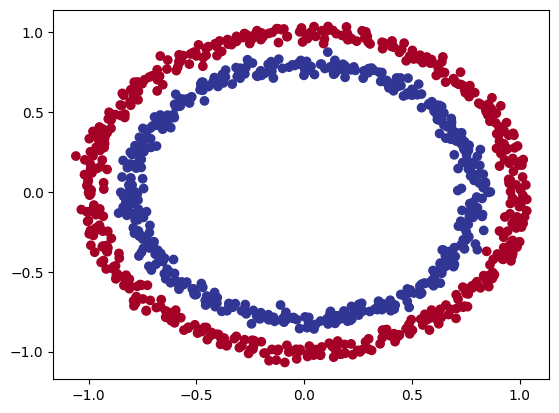

In [22]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 988us/step
doing binary classification


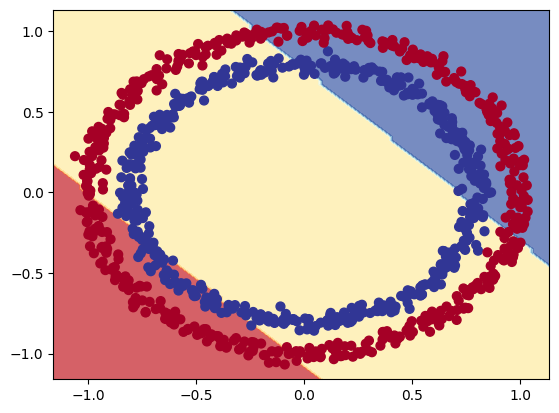

In [23]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function

In [24]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu),
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X,y,epochs=100,verbose=0)

313/313 [==============================] - 0s 935us/step
doing binary classification


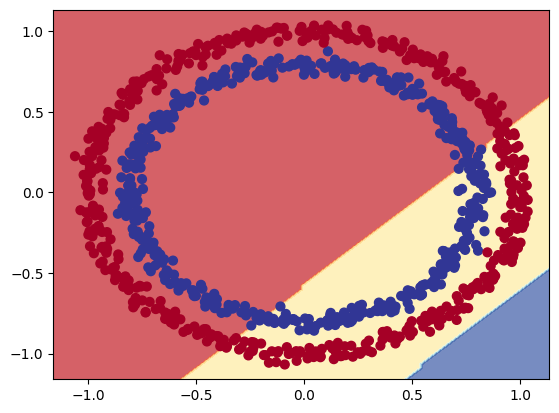

In [25]:
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [35]:
# time to replicate the multi-layer neural network from teensorflow playground

#Set a random seed
tf.random.set_seed(42)
# Create a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit the model
history = model_6.fit(X,y,epochs=250,verbose=0)

In [36]:
# evaluate our model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 937us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 736us/step
doing binary classification


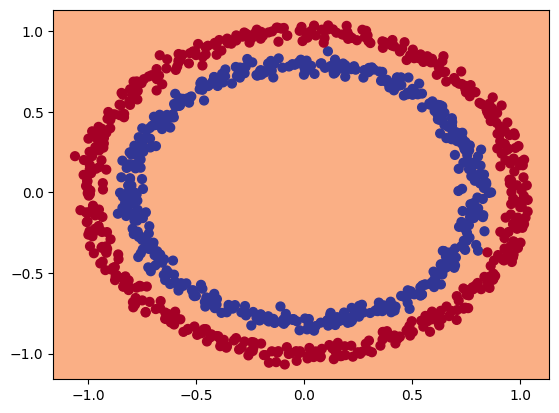

In [37]:
# how do our model prediction look?
plot_decision_boundary(model_6,X,y)

In [39]:
#Set a random seed
tf.random.set_seed(42)
# Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

# Fit ,activation="sigmoid"the model
history = model_7.fit(X,y,epochs=250,verbose=0)

In [40]:
# evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 969us/step - loss: 0.0219 - accuracy: 1.0000


[0.021936088800430298, 1.0]

313/313 [==============================] - 1s 2ms/step
doing binary classification


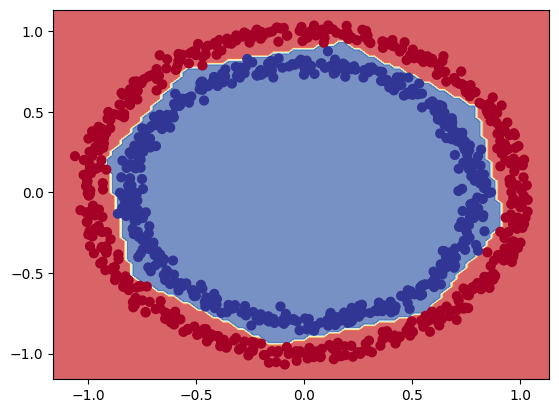

In [41]:
plot_decision_boundary(model_7,X,y)

 ## Now we've discussed the conscept of linear and non_linear functions(or lines), let's see them in action

In [43]:
# Create a  toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

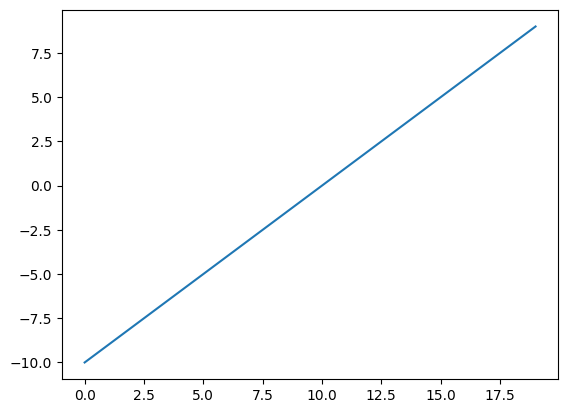

In [44]:
# Visualize our toy tensor
plt.plot(A);

In [47]:
# lets start by replicating sigmoid(x) = 1 / (1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

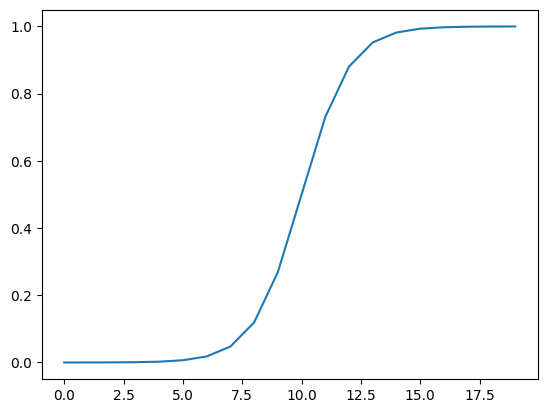

In [48]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [49]:
# Let's recreate relu function
def relu(x):
  return tf.maximum(0,x)

# use the relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

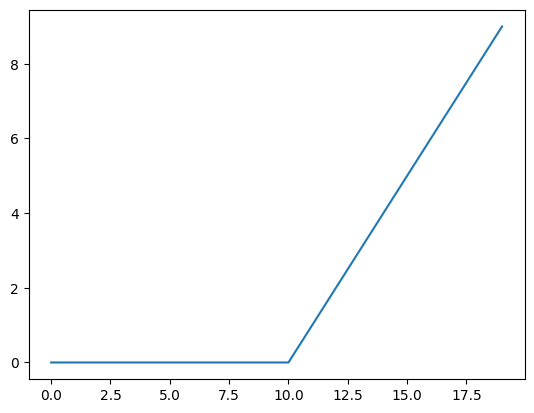

In [50]:
# plot our toy tensor transformed by relu
plt.plot(relu(A))

##Evaluating and improving our classification

In [51]:
# Split into train
X_train, y_train = X[:800],y[:800]
X_test, y_test = X[800:],y[800:]

In [54]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

#Set a random seed
tf.random.set_seed(42)
# Create a model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["accuracy"])

# Fit ,activation="sigmoid"the model
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5138
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5612
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5537
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6738 - accuracy: 0.5688
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.5987
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6566 - accuracy: 0.5813
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6390 - accuracy: 0.6525
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.7063
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.7750
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5108 - accuracy: 0.8888
Epoch 11/25
25/25 [

In [55]:
# Evaluate the model
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0693 - accuracy: 0.9950


[0.06927511096000671, 0.9950000047683716]

313/313 [==============================] - 0s 780us/step
doing binary classification
313/313 [==============================] - 0s 795us/step
doing binary classification


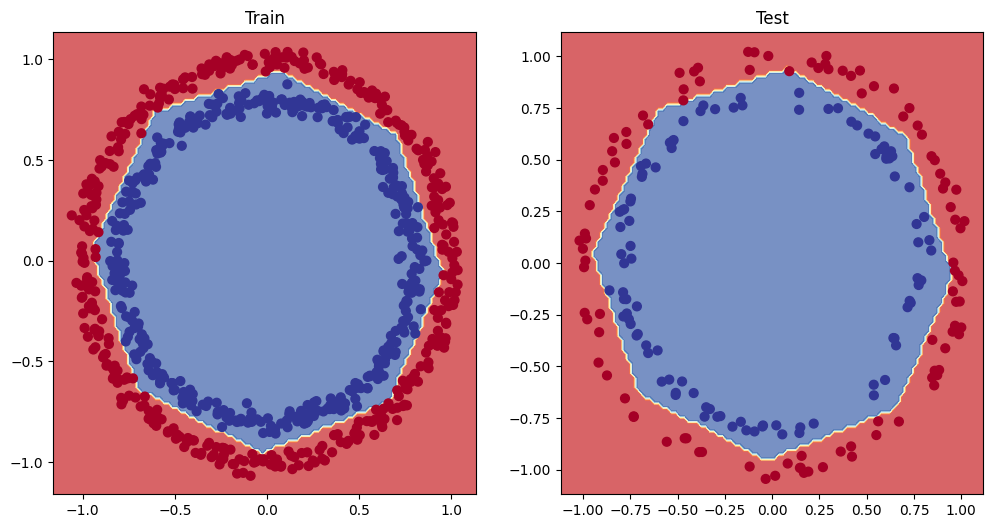

In [56]:
# Plot the decision boundary for the training and test data sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test,y_test)
plt.show()

## Plot the loss (or training curves)


In [57]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.689431,0.51375
1,0.684306,0.56125
2,0.679506,0.55375
3,0.673846,0.56875
4,0.668213,0.59875
5,0.656627,0.58125
6,0.638951,0.65250
7,0.612727,0.70625
8,0.568260,0.77500
9,0.510787,0.88875


Text(0.5, 1.0, 'Model_8 loss curves')

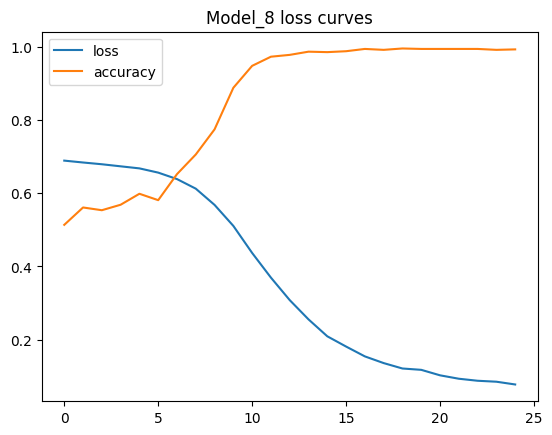

In [58]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")